In [1]:
from iterative_solvers import deflated_fgmres, deflated_fgmres3, deflated_pcg, deflated_gmres, recycled_fgmres, extend_orthonormal_basis, gmres_deflated_preconditioned, extend_A_orthonormal_basis
from operators import BlockMatrixOperator, BlockTriangularPreconditioner
from tunnel_with_subdomains import load_matrices_from_hdf5, load_vectors_from_hdf5

problem_no = 19
path_to_data = f"exported_data/testrun_{problem_no}/"

# loading
A_blocks = load_matrices_from_hdf5(f"{path_to_data}data_as_blocks.h5")
Ptdiagblocks = load_matrices_from_hdf5(f"{path_to_data}data_diag_preco.h5")
Ptblocks = load_matrices_from_hdf5(f"{path_to_data}data_triang_preco.h5")
rhs_u, rhs_p = load_vectors_from_hdf5(f"{path_to_data}data_rhs.h5")  # each rhs_* is a list of ndarrays
sol_u, sol_p = load_vectors_from_hdf5(f"{path_to_data}data_sol.h5")  # each rhs_* is a list of ndarrays

In [2]:
import numpy as np
A_mat = BlockMatrixOperator(A_blocks)
# Pt_inv = BlockTriangularPreconditioner(Ptblocks, False)
Pt_inv = BlockTriangularPreconditioner(Ptdiagblocks, False)


In [6]:
import numpy as np
from scipy.sparse.linalg import gmres, LinearOperator

iter_list = []
res_list = []
true_res_list = []
err_list = []
Z = None
Z_list = []
x_sol = None

warm_up = 10

for index in range(716):
    rhs_vec = np.concatenate([rhs_u[index], rhs_p[index]])
    sol_vec = np.concatenate([sol_u[index], sol_p[index]])
    if index < warm_up:
        x_sol, iters, res_hist = deflated_fgmres3(A_mat, rhs_vec, Pt_inv, maxits=30, tol=1e-10, x0=x_sol)
    else:
        x_sol, iters, res_hist = deflated_fgmres3(A_mat, rhs_vec, Pt_inv, maxits=30, tol=1e-10, Z=Z)

    if np.linalg.norm(x_sol) > 10:
        Z_list.append(x_sol)
    if index >= (warm_up - 1):
        Z = np.column_stack(Z_list)
        Z, _ = np.linalg.qr(Z, mode='reduced')

    # if Z is None:
    #     if np.linalg.norm(x_sol) > 0:
    #         Z = x_sol / np.linalg.norm(x_sol)
    #         Z = Z.reshape(-1, 1)
    # else:
    #     Z = extend_A_orthonormal_basis(A_mat, Z, x_sol.reshape(-1, 1), droptol=1e-6, max_size=1000, verbose=True)
    #     if index % 100 == warm_up:
    #         # Z, _ = np.linalg.qr(Z)
    #         pass

    iter_list.append(iters)
    res_list.append(np.linalg.norm(A_mat(x_sol) - rhs_vec)/np.linalg.norm(rhs_vec))
    true_res_list.append(np.linalg.norm(A_mat(sol_vec) - rhs_vec)/np.linalg.norm(rhs_vec))
    err_list.append(np.linalg.norm(x_sol - sol_vec)/np.linalg.norm(sol_vec))
    print(
        f"Inex {index}: {iters}, {
            np.linalg.norm(
                Pt_inv(A_mat(x_sol) -
                rhs_vec)) /
            np.linalg.norm(rhs_vec)}, {
            np.linalg.norm(
                x_sol -
                sol_vec) /
            np.linalg.norm(sol_vec)} {
            np.linalg.norm(
                Pt_inv(A_mat(sol_vec) -
                rhs_vec)) /
            np.linalg.norm(rhs_vec)}")

print(f"Number of iterations: {iters}")
print(f"Relative residual: {res_hist[-1]}")
print(f"Relative error: {np.linalg.norm(x_sol - sol_vec)/np.linalg.norm(sol_vec)}")

Inex 0: 0, nan, nan nan
Inex 1: 14, 1.965268496312867e-10, 1.7822889108478267e-14 1.965473914748658e-10
Inex 2: 13, 2.3660770610071315e-10, 1.9521383323382337e-09 3.339523407675715e-09
Inex 3: 12, 3.461816394118756e-09, 3.1918480260135685e-09 2.351867917356734e-09
Inex 4: 11, 2.6073661304578476e-09, 3.113462682851767e-09 1.8003439627162612e-09
Inex 5: 11, 2.0103435701553684e-09, 2.910002102415421e-09 1.4546554994346235e-09
Inex 6: 11, 1.6178612507157247e-09, 2.733869081727665e-09 1.2194072375410538e-09
Inex 7: 11, 1.34848378132167e-09, 2.583362575464262e-09 1.0496458513276273e-09
Inex 8: 11, 1.155115251106721e-09, 2.4525801879627655e-09 9.217326736164846e-10
Inex 9: 11, 1.0107559699817933e-09, 2.336794380348897e-09 8.221297516480014e-10
Inex 10: 30, 0.9473728639539835, 1.9340314879499234 7.425468060425989e-10


KeyboardInterrupt: 

Inex 57: 13, 3.732370183628893e-11, 0.023260548091013897 1.565595025534074e-11
6.883958052780595e-09


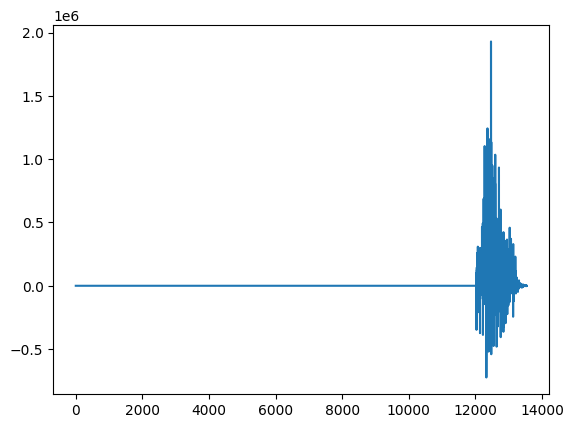

In [ ]:
print(
    f"Inex {index}: {iters}, {
        np.linalg.norm(
            A_mat(x_sol) -
            rhs_vec) /
        np.linalg.norm(rhs_vec)}, {
        np.linalg.norm(
            x_sol -
            sol_vec) /
        np.linalg.norm(sol_vec)} {
        np.linalg.norm(
            A_mat(sol_vec) -
            rhs_vec) /
        np.linalg.norm(rhs_vec)}")
print(
    f"{
        np.linalg.norm(
            A_mat(x_sol - sol_vec)) /
        np.linalg.norm(
            x_sol -
            sol_vec)}")
plt.plot(x_sol -
         sol_vec)


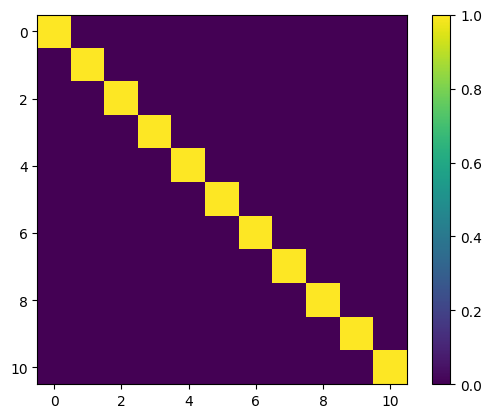

In [7]:
import matplotlib.pyplot as plt
plt.imshow(Z.T @ Z)
plt.colorbar()

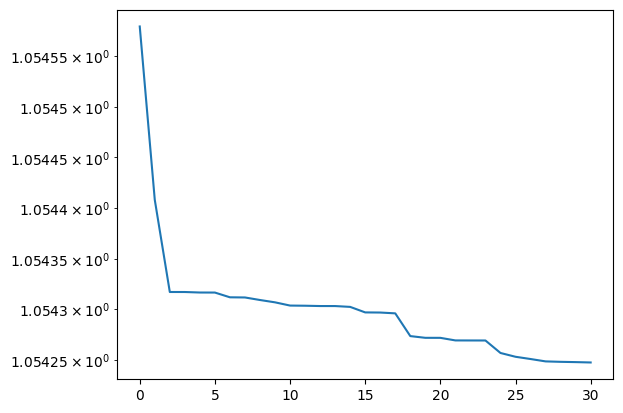

In [8]:
import matplotlib.pyplot as plt
plt.semilogy(res_hist)

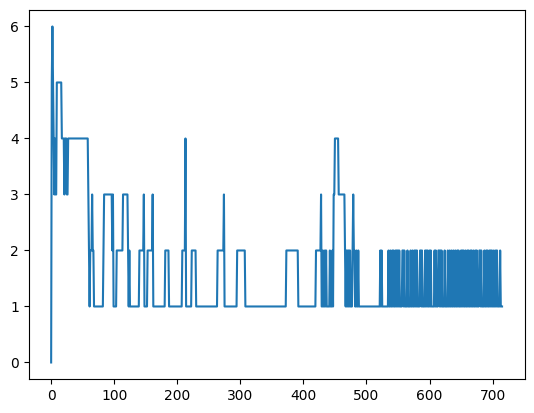

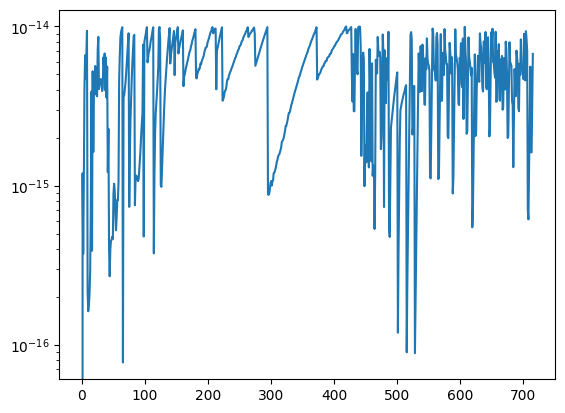

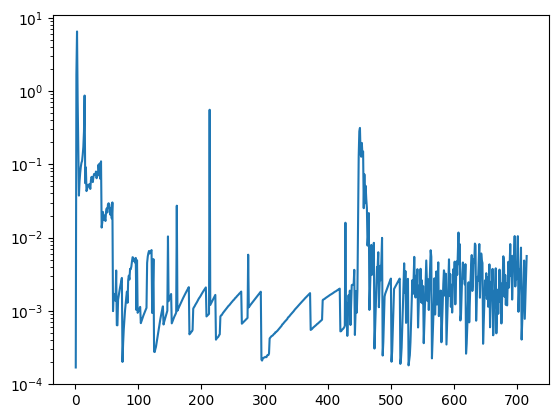

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(iter_list)
plt.show()

plt.figure()
plt.semilogy(res_list)
plt.show()

plt.figure()
plt.semilogy(err_list)
plt.show()

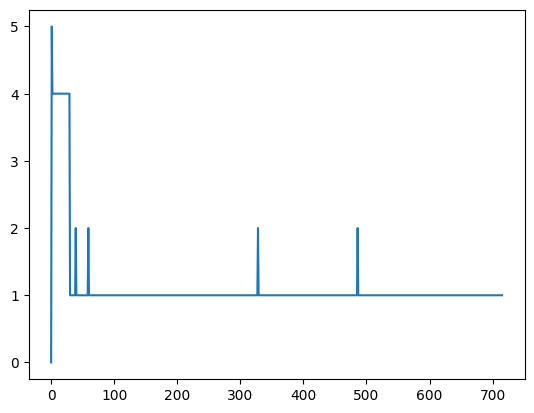

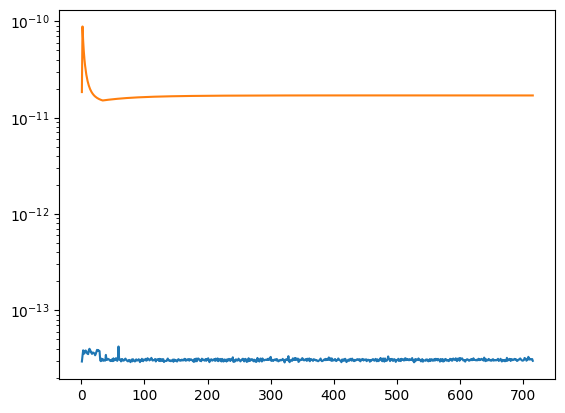

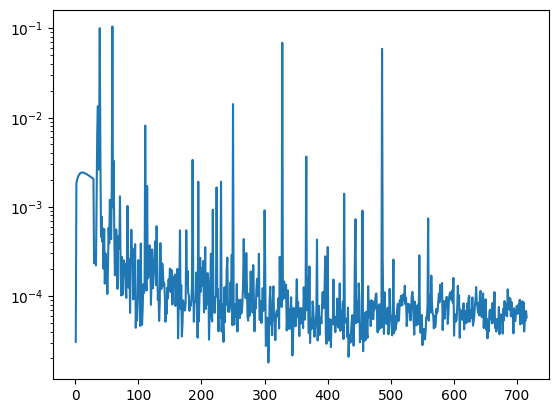

In [37]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(iter_list)
plt.show()

plt.figure()
plt.semilogy(res_list)
plt.semilogy(true_res_list)
plt.show()

plt.figure()
plt.semilogy(err_list)
plt.show()

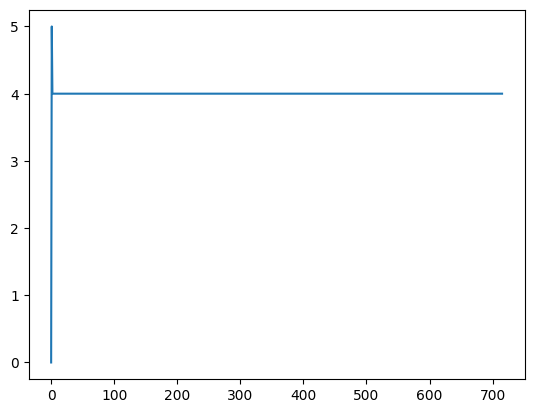

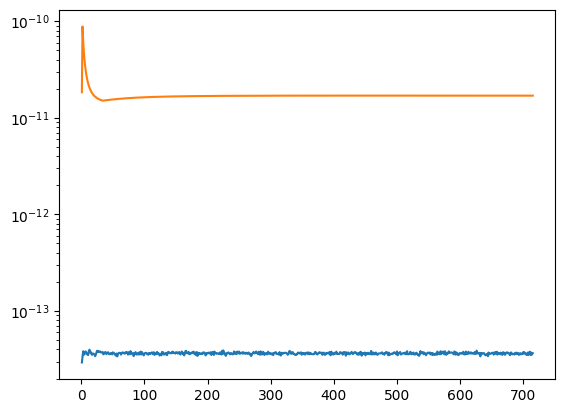

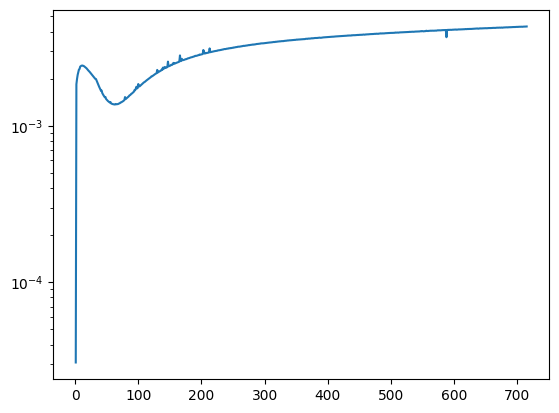

In [24]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(iter_list)
plt.show()

plt.figure()
plt.semilogy(res_list)
plt.semilogy(true_res_list)
plt.show()

plt.figure()
plt.semilogy(err_list)
plt.show()

In [30]:
import numpy as np
from scipy.sparse.linalg import gmres, LinearOperator

iter_list = []
res_list = []
true_res_list = []
err_list = []
Z = None
Z_list = []
x_sol = None

warm_up = 716

for index in range(716):
    rhs_vec = np.concatenate([rhs_u[index], rhs_p[index]])
    sol_vec = np.concatenate([sol_u[index], sol_p[index]])
    if index < warm_up:
        x_sol, iters, res_hist = deflated_fgmres(A_mat, rhs_vec, Pt_inv, maxits=30, tol=1e-14, x0 = x_sol)
    else:
        x_sol, iters, res_hist = deflated_fgmres(A_mat, rhs_vec, Pt_inv, maxits=30, tol=1e-14, Z=Z)

    # Z_list.append(x_sol)
    # if index >= (warm_up - 1):
    #     Z = np.column_stack(Z_list[index - (warm_up - 1):])
    #     Z, _ = np.linalg.qr(Z)

    # if Z is None:
    #     if np.linalg.norm(x_sol) > 0:
    #         Z = x_sol / np.linalg.norm(x_sol)
    #         Z = Z.reshape(-1, 1)
    # else:
    #     Z = extend_orthonormal_basis(Z, x_sol.reshape(-1,1), droptol=1e-6, max_size=100, verbose=True)
    #     if index % 100 == 15:
    #         Z, _ = np.linalg.qr(Z)

    iter_list.append(iters)
    res_list.append(np.linalg.norm(A_mat(x_sol) - rhs_vec)/np.linalg.norm(rhs_vec))
    true_res_list.append(np.linalg.norm(A_mat(sol_vec) - rhs_vec)/np.linalg.norm(rhs_vec))
    err_list.append(np.linalg.norm(x_sol - sol_vec)/np.linalg.norm(sol_vec))
    print(f"Inex {index}: {iters}, {np.linalg.norm(A_mat(x_sol) - rhs_vec)/np.linalg.norm(rhs_vec)}, {np.linalg.norm(x_sol - sol_vec)/np.linalg.norm(sol_vec)} {np.linalg.norm(A_mat(sol_vec) - rhs_vec)/np.linalg.norm(rhs_vec)}")

print(f"Number of iterations: {iters}")
print(f"Relative residual: {res_hist[-1]}")
print(f"Relative error: {np.linalg.norm(x_sol - sol_vec)/np.linalg.norm(sol_vec)}")

Inex 0: 0, nan, nan nan
Inex 1: 5, 2.9312348064235994e-14, 3.07336721801606e-05 1.8393115845525952e-11
Inex 2: 4, 3.210298522174017e-14, 9.26530046072677e-05 8.824143959469881e-11
Inex 3: 4, 3.5049709367420153e-14, 0.00012849733699653177 6.31212023010683e-11
Inex 4: 3, 3.378235716413349e-14, 0.003510547796112802 4.924929695979676e-11
Inex 5: 3, 3.252379003783634e-14, 0.0028764337427348006 4.0689036534749005e-11
Inex 6: 3, 3.4603916709236965e-14, 0.002653052747676193 3.497394641866908e-11
Inex 7: 3, 3.55309856514557e-14, 0.002427645551956487 3.093974123358157e-11
Inex 8: 3, 3.5016548776987515e-14, 0.002221967528560754 2.797184068390156e-11
Inex 9: 3, 3.4148518392704135e-14, 0.002038269582625613 2.5717085779085466e-11
Inex 10: 2, 3.096351361082957e-14, 0.0009516954236809676 2.3962462129716392e-11
Inex 11: 2, 3.14527084100405e-14, 0.0009159276367514028 2.2569146704556238e-11
Inex 12: 2, 3.365586632494048e-14, 0.0008416925627376459 2.144319170648829e-11
Inex 13: 2, 3.3217592964482946e-14, 

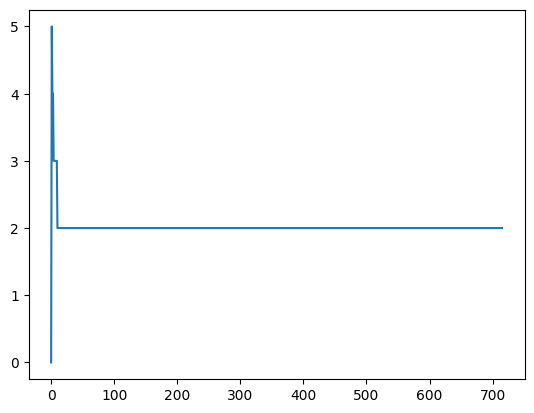

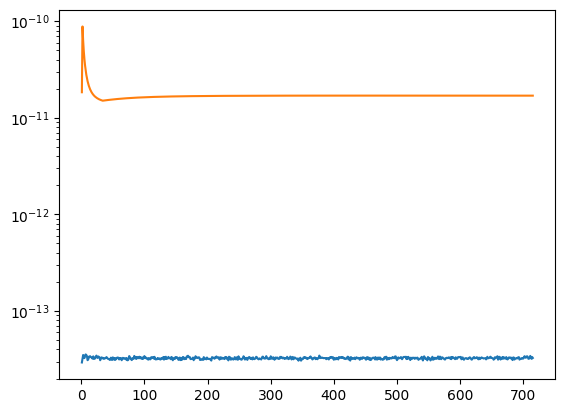

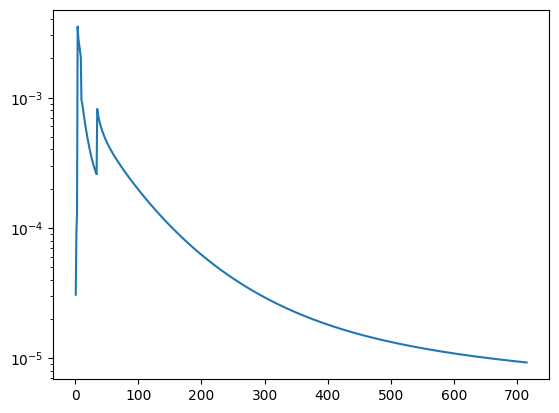

In [31]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(iter_list)
plt.show()

plt.figure()
plt.semilogy(res_list)
plt.semilogy(true_res_list)
plt.show()

plt.figure()
plt.semilogy(err_list)
plt.show()